## Goals
- Predict Churn (no activity w/i 30 days of latest date in dataset)
- Determine what factors influence churn

### Initial Thoughts
- What would cause a rider to churn?
    - Cost, monetary
    - inconvenient, need to wait too long, a time cost
    - bad experiences (don't want to get preached to during your trip)
    - Price shock (those midnight rides are costly!)
    - seasonal / special event rider. Do they like to drive themselves most of the time, then save rideshare for special occasions?
- Flip it! What would cause a rider to remain loyal?
    - Built the habit / this is a daily part of their life!
    - Live in a place where owning a car is inconvenient / driving is troublesome
    - Cost is less of an issue (they are from a better part of town? maybe they take shorter rides and never pay a big, one-time fee?)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas.plotting import scatter_matrix
%matplotlib inline

In [95]:
def overlayed_hists(df, col, target_label, bins=20):
    mask = df[target_label] == True
    df.loc[mask, col].hist(normed=True, bins=bins, alpha=0.5, label='{}'.format(target_label))
    df.loc[~mask, col].hist(normed=True, bins=bins, alpha=0.5, label='Not {}'.format(target_label))
    plt.legend()

In [2]:
rideshare_df = pd.read_csv('data/churn.csv')

In [3]:
rideshare_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [4]:
rideshare_df.info()
# Three cols /w missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
luxury_car_user           50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


### Thoughts after seeing the data
- Each row is a user, rather than a ride
- Best features?
    - avg dist, surge_pct, and trips in first 30 days seem indicative to me
- Three cols w/ missing data
     - Two are ratings cols, can probably impute, will need to care for leakage
- Need to create target
- Possible new features:
    - TODO

In [5]:
# TODO - create target
# TODO - read .csv in as datetime

rideshare_df.loc[:, 'last_trip_date'] = pd.to_datetime(rideshare_df['last_trip_date'])

In [6]:
churn_date = rideshare_df['last_trip_date'].max() + dt.timedelta(-30)
rideshare_df['Churned'] = rideshare_df['last_trip_date'] <= churn_date

In [88]:
rideshare_df['Churned'].value_counts() * 1.0 / len(rideshare_df) 
# most people churned

True     0.6338
False    0.3662
Name: Churned, dtype: float64

(array([ 735234.,  735265.,  735293.,  735324.,  735354.,  735385.,  735415.]),
 <a list of 7 Text xticklabel objects>)

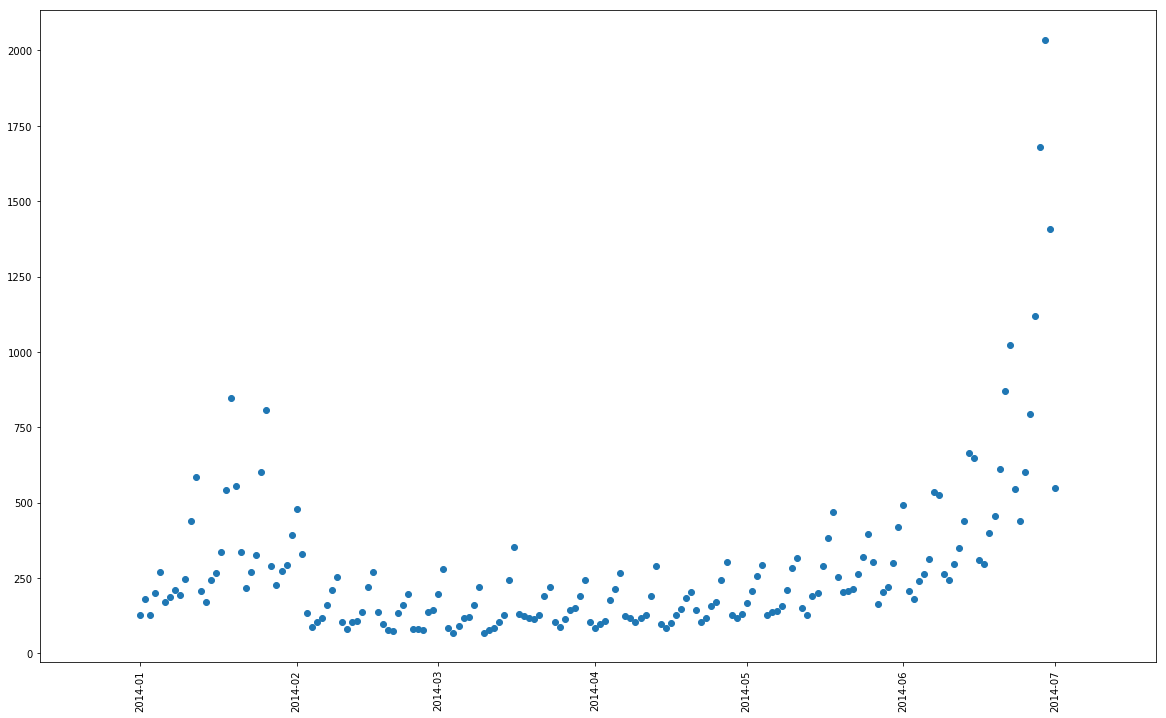

In [77]:
plt.figure(figsize=(20,12))
x = rideshare_df['last_trip_date'].value_counts().sort_index().index
y = rideshare_df['last_trip_date'].value_counts().sort_index().values
plt.scatter(x, y)
plt.xticks(rotation='vertical')
# a lot of users last trip in the last month, interesting trend in janurary

In [78]:
# drop things used in target b/c leakage bad
rideshare_df.drop(['last_trip_date'], axis=1, inplace=True)

In [80]:
# signup date is also a date
rideshare_df.loc[:, 'signup_date'] = pd.to_datetime(rideshare_df['signup_date'])

(array([ 735224.,  735231.,  735238.,  735245.,  735252.,  735259.,
         735266.,  735273.]), <a list of 8 Text xticklabel objects>)

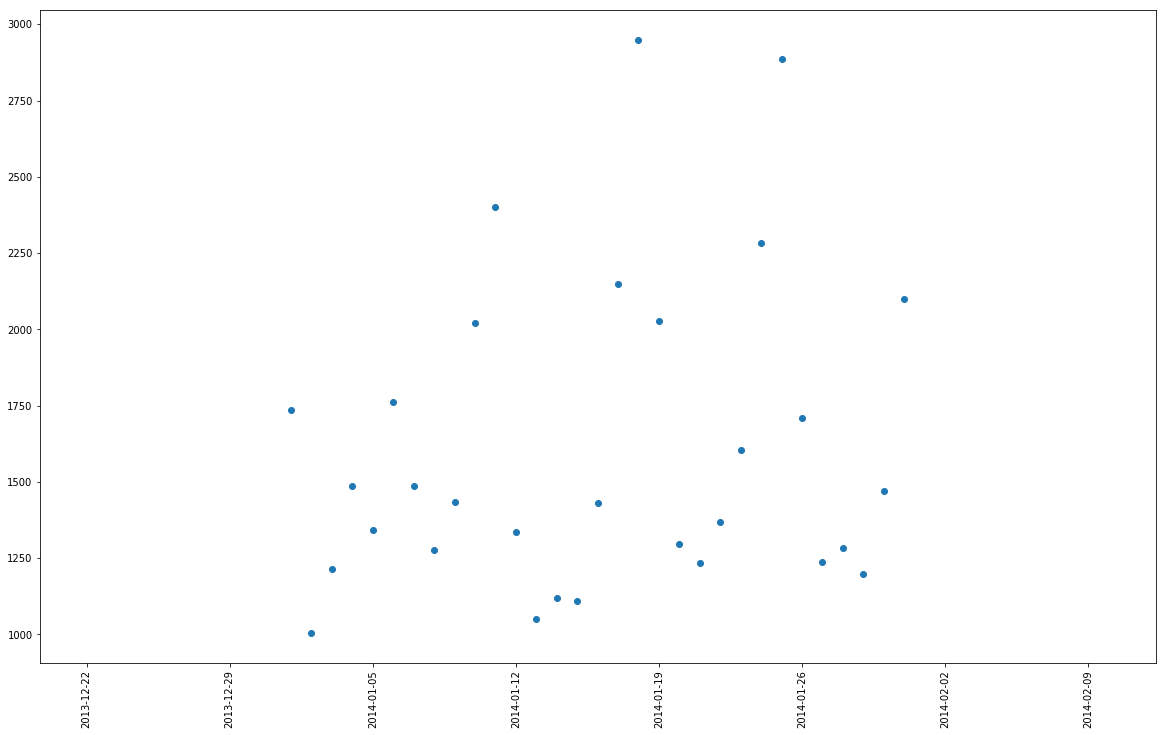

In [81]:
plt.figure(figsize=(20,12))
x = rideshare_df['signup_date'].value_counts().sort_index().index
y = rideshare_df['signup_date'].value_counts().sort_index().values
plt.scatter(x, y)
plt.xticks(rotation='vertical')

(array([ 735224.,  735231.,  735238.,  735245.,  735252.,  735259.,
         735266.,  735273.]), <a list of 8 Text xticklabel objects>)

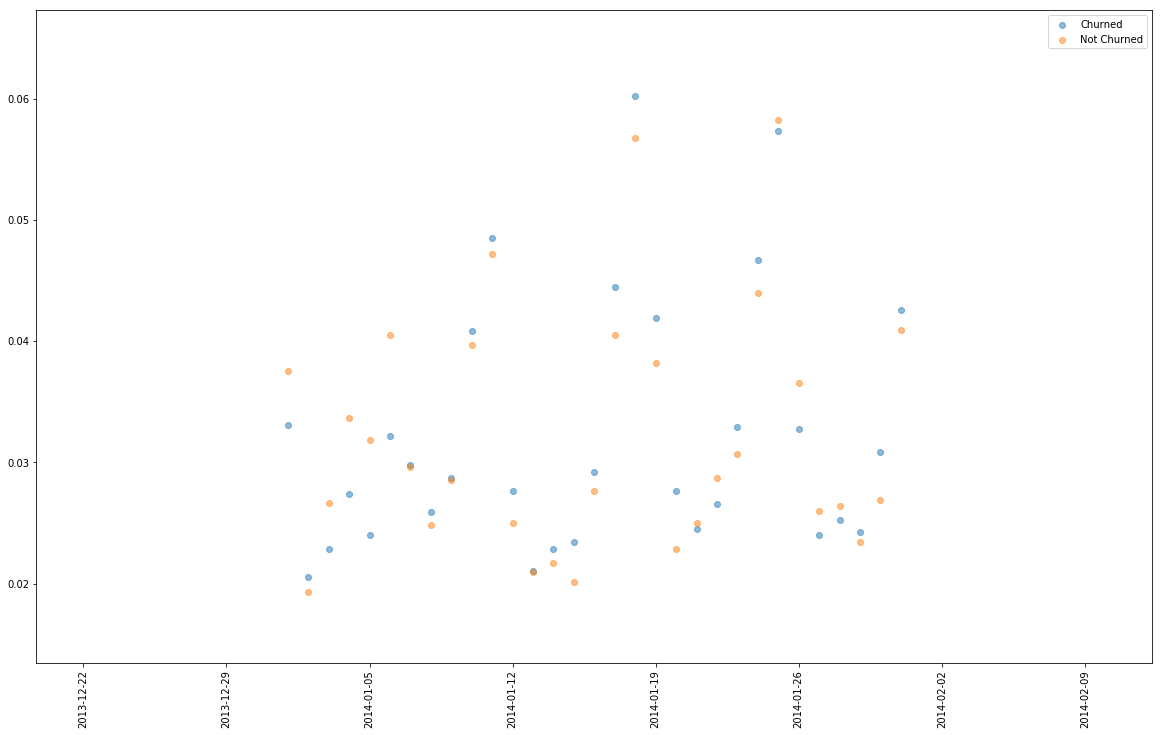

In [87]:
mask = rideshare_df['Churned'] 
plt.figure(figsize=(20,12))
x_churn = rideshare_df.loc[mask, 'signup_date'].value_counts().sort_index().index
y_churn = rideshare_df.loc[mask, 'signup_date'].value_counts().sort_index().values * 1.0 / len(rideshare_df.loc[mask])
x_no_churn = rideshare_df.loc[~mask, 'signup_date'].value_counts().sort_index().index
y_no_churn = rideshare_df.loc[~mask, 'signup_date'].value_counts().sort_index().values * 1.0 / len(rideshare_df.loc[~mask])
plt.scatter(x_churn, y_churn, label='Churned', alpha=0.5)
plt.scatter(x_no_churn, y_no_churn, label='Not Churned', alpha=0.5)
plt.legend()
plt.xticks(rotation='vertical')
# no real pattern here?

In [41]:
rideshare_df['avg_dist'].describe()

count    50000.000000
mean         5.796827
std          5.707357
min          0.000000
25%          2.420000
50%          3.880000
75%          6.940000
max        160.960000
Name: avg_dist, dtype: float64

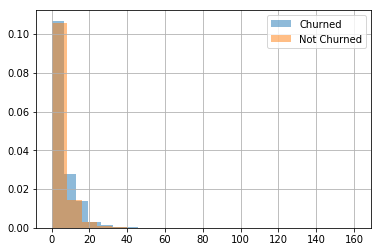

In [44]:
overlayed_hists(rideshare_df, 'avg_dist', 'Churned')
# not too much signal?

In [10]:
# avg_surge
rideshare_df['avg_surge'].describe()

count    50000.000000
mean         1.074764
std          0.222336
min          1.000000
25%          1.000000
50%          1.000000
75%          1.050000
max          8.000000
Name: avg_surge, dtype: float64

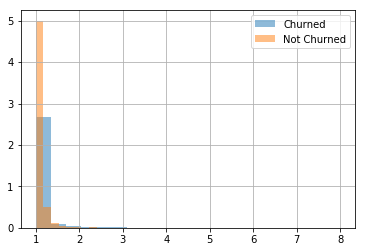

In [49]:
overlayed_hists(rideshare_df, 'avg_surge', 'Churned')
# seems like a clearer distinction, right off the bat

In [53]:
# which city?
rideshare_df.groupby(['city']).size()
# Winterfell is most established or a bigger city, King's Landing either more recently introduced or a smaller place

city
Astapor           16534
King's Landing    10130
Winterfell        23336
dtype: int64

In [55]:
rideshare_df.groupby(['city', 'Churned']).size() * 1.0 / rideshare_df.groupby(['city']).size()
# King's Landing is retaining a lot of people, Astapor seems to be losing a lot? something to look into

city            Churned
Astapor         False      0.243256
                True       0.756744
King's Landing  False      0.622606
                True       0.377394
Winterfell      False      0.342004
                True       0.657996
dtype: float64

In [61]:
# pipeline class, need to drop one depending on model
rideshare_df = pd.get_dummies(rideshare_df, columns=['city'])

ValueError: labels ['city'] not contained in axis

In [62]:
rideshare_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Churned,missing_by_driver,five_by_driver,missing_of_driver,five_of_driver,city_Astapor,city_King's Landing,city_Winterfell
0,3.67,5.0,4.7,1.10,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,False,False,True,False,False,0,1,0
1,8.26,5.0,5.0,1.00,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,True,False,True,False,True,1,0,0
2,0.77,5.0,4.3,1.00,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,True,False,True,False,False,1,0,0
3,2.36,4.9,4.6,1.14,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,False,False,False,False,False,0,1,0
4,3.13,4.9,4.4,1.19,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,True,False,False,False,False,0,0,1


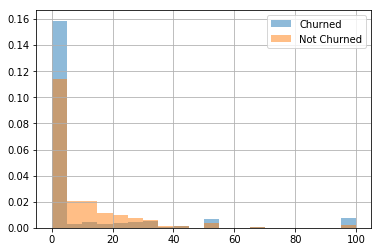

In [89]:
overlayed_hists(rideshare_df, 'surge_pct', 'Churned')
# difference between churned and not churned, interesting

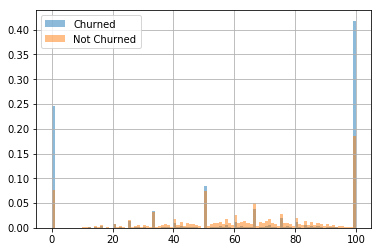

In [97]:
overlayed_hists(rideshare_df, 'weekday_pct', 'Churned', bins=100)
# woah, interesting spikes on the ends, in the middle, 0, 50, 100 pecrent of weekday trips, these are hard numbers to hit


In [100]:
# weekday_pct investigation
mask = rideshare_df['weekday_pct'] == 0
rideshare_df.loc[mask].describe().T
# surge_pct is at 100, max avg_dist at 129, trips in first 30 days are zero or one
# some poeple sign up, but don't use it in the first thirty days?

,count,mean,std,min,25%,50%,75%,max
avg_dist,9203.0,5.879650,6.257475,0.0,2.080000,3.740000,7.23,129.89
avg_rating_by_driver,9203.0,4.787705,0.586687,1.0,5.000000,5.000000,5.00,5.00
avg_rating_of_driver,9203.0,4.615320,0.609865,1.0,4.601559,4.601559,5.00,5.00
avg_surge,9203.0,1.116809,0.340185,1.0,1.000000,1.000000,1.00,4.50
surge_pct,9203.0,13.259372,30.465520,0.0,0.000000,0.000000,0.00,100.00
trips_in_first_30_days,9203.0,0.821689,0.906423,0.0,0.000000,1.000000,1.00,10.00
weekday_pct,9203.0,0.000000,0.000000,0.0,0.000000,0.000000,0.00,0.00
city_Astapor,9203.0,0.370097,0.482857,0.0,0.000000,0.000000,1.00,1.00
city_King's Landing,9203.0,0.158753,0.365465,0.0,0.000000,0.000000,0.00,1.00
city_Winterfell,9203.0,0.471151,0.499194,0.0,0.000000,0.000000,1.00,1.00


In [101]:
mask = rideshare_df['weekday_pct'] == 100
rideshare_df.loc[mask].describe().T
# also zero or one 

,count,mean,std,min,25%,50%,75%,max
avg_dist,16659.0,7.354910,7.307634,0.0,2.370000,4.71,10.36,160.96
avg_rating_by_driver,16659.0,4.807183,0.523527,1.0,5.000000,5.00,5.00,5.00
avg_rating_of_driver,16659.0,4.624813,0.578463,1.0,4.601559,4.70,5.00,5.00
avg_surge,16659.0,1.051446,0.235917,1.0,1.000000,1.00,1.00,8.00
surge_pct,16659.0,5.693637,19.752676,0.0,0.000000,0.00,0.00,100.00
trips_in_first_30_days,16659.0,1.076535,1.635125,0.0,0.000000,1.00,1.00,37.00
weekday_pct,16659.0,100.000000,0.000000,100.0,100.000000,100.00,100.00,100.00
city_Astapor,16659.0,0.353983,0.478218,0.0,0.000000,0.00,1.00,1.00
city_King's Landing,16659.0,0.190348,0.392587,0.0,0.000000,0.00,0.00,1.00
city_Winterfell,16659.0,0.455670,0.498046,0.0,0.000000,0.00,1.00,1.00


In [ ]:
 mask = rideshare_df['weekday_pct'] == 50
rideshare_df.loc[mask].describe().T
# also zero or one 

In [103]:
# preliminary feature engineering
# trips in first few days 0, 1, 0/1/2

rideshare_df['one_trip_first_thirty'] = rideshare_df['trips_in_first_30_days'] == 1
rideshare_df['zero_trip_first_thirty'] = rideshare_df['trips_in_first_30_days'] == 0

In [104]:
rideshare_df['zero_one_trip_first_thirty'] = rideshare_df['one_trip_first_thirty'] | rideshare_df['zero_trip_first_thirty']

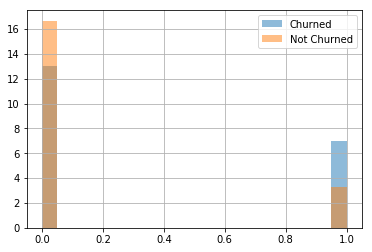

In [105]:
overlayed_hists(rideshare_df, 'one_trip_first_thirty', 'Churned')

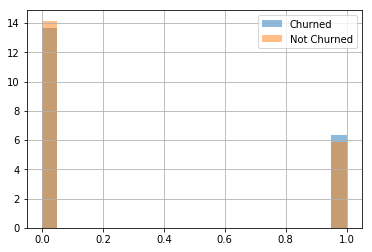

In [106]:
overlayed_hists(rideshare_df, 'zero_trip_first_thirty', 'Churned')

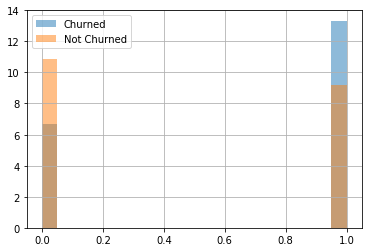

In [107]:
overlayed_hists(rideshare_df, 'zero_one_trip_first_thirty', 'Churned')

zero trips seems to have signal, maybe more in zero/one trips, one trips doesn't seem to give us much. can use these features instead of weekday tirp pct? we see!

In [12]:
# TODO - check out three cols w/ missing data

rideshare_df['avg_rating_by_driver'].describe()

count    49799.000000
mean         4.778158
std          0.446652
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [13]:
rideshare_df.drop(['Chruned'], axis=1, inplace=True)

ValueError: labels ['Chruned'] not contained in axis

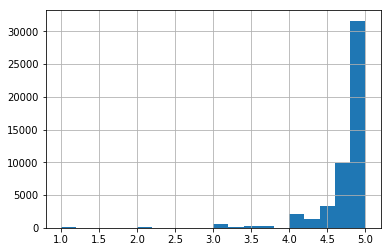

In [14]:
rideshare_df['avg_rating_by_driver'].hist(bins=20)
# heavily right skewed, might be better to do five / not five?

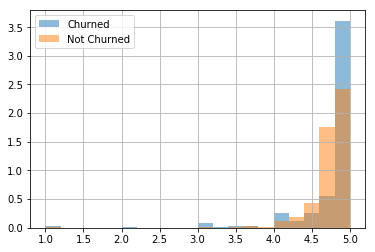

In [15]:
mask = rideshare_df['Churned'] == True
rideshare_df.loc[mask, 'avg_rating_by_driver'].hist(normed=True, bins=20, alpha=0.5, label='Churned')
rideshare_df.loc[~mask, 'avg_rating_by_driver'].hist(normed=True, bins=20, alpha=0.5, label='Not Churned')
plt.legend()

In [16]:
rideshare_df['missing_by_driver'] = rideshare_df['avg_rating_by_driver'].isnull()

In [17]:
rideshare_df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,luxury_car_user,weekday_pct,Churned,missing_by_driver
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,False,False
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,True,False
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,True,False
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,False,False
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,True,False


In [18]:
rideshare_df.groupby(['missing_by_driver', 'Churned']).size()

missing_by_driver  Churned
False              False      18276
                   True       31523
True               False         34
                   True         167
dtype: int64

In [19]:
rideshare_df['five_by_driver'] = rideshare_df['avg_rating_by_driver'] == 5

In [20]:
rideshare_df.groupby(['five_by_driver', 'Churned']).size()

five_by_driver  Churned
False           False      11640
                True        9852
True            False       6670
                True       21838
dtype: int64

In [21]:
# Create pipeline/imputer class for this
rideshare_df['avg_rating_by_driver'].median()

5.0

In [22]:
rideshare_df['avg_rating_by_driver'].mean()

4.77815819594771

In [23]:
# five or not five can is a potential feature, so I'll tentatively fill w/ mean
by_driver_mean = rideshare_df['avg_rating_by_driver'].mean()
rideshare_df['avg_rating_by_driver'].fillna(by_driver_mean, inplace=True)

In [24]:
# I want to do all the same things for ratings of driver... Should've made this all a function

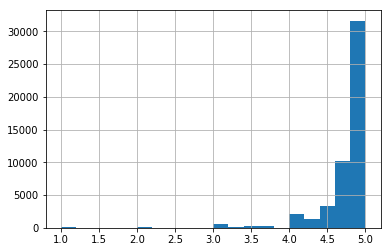

In [25]:
rideshare_df['avg_rating_of_driver'].describe()
rideshare_df['avg_rating_by_driver'].hist(bins=20)
mask = rideshare_df['Churned'] == True
rideshare_df.loc[mask, 'avg_rating_by_driver'].hist(normed=True, bins=20, alpha=0.5, label='Churned')
rideshare_df.loc[~mask, 'avg_rating_by_driver'].hist(normed=True, bins=20, alpha=0.5, label='Not Churned')
rideshare_df['missing_by_driver'] = rideshare_df['avg_rating_by_driver'].isnull()
rideshare_df.groupby(['missing_by_driver', 'Churned']).size()
rideshare_df['five_by_driver'] = rideshare_df['avg_rating_by_driver'] == 5

In [26]:
rideshare_df['avg_rating_of_driver'].describe()

count    41878.000000
mean         4.601559
std          0.617338
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

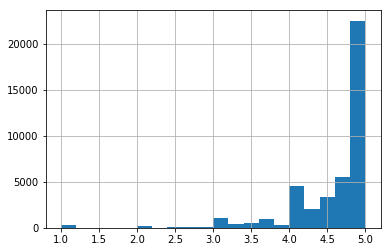

In [27]:
rideshare_df['avg_rating_of_driver'].hist(bins=20)
# more variation than by_driver, still heavily left skewed

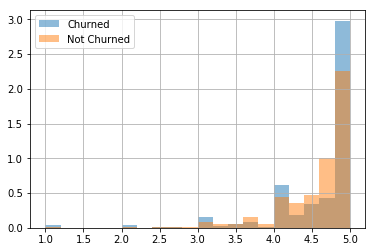

In [28]:
mask = rideshare_df['Churned'] == True
rideshare_df.loc[mask, 'avg_rating_of_driver'].hist(normed=True, bins=20, alpha=0.5, label='Churned')
rideshare_df.loc[~mask, 'avg_rating_of_driver'].hist(normed=True, bins=20, alpha=0.5, label='Not Churned')
plt.legend()
# most people rate their drivers a five, of those who didn't churn they have more variation in their ratings

In [29]:
rideshare_df['missing_of_driver'] = rideshare_df['avg_rating_of_driver'].isnull()


In [30]:
rideshare_df['five_of_driver'] = rideshare_df['avg_rating_of_driver'] == 5

In [31]:
rideshare_df.groupby(['missing_by_driver', 'Churned']).size()
# missing by driver semes to more heavily indicate churn, not missing by driver doesn't tell us much


missing_by_driver  Churned
False              False      18310
                   True       31690
dtype: int64

In [32]:
rideshare_df.groupby(['five_of_driver', 'Churned']).size() * 1.0 / len(rideshare_df)
# might help us a little bit, since we're not looking at avg churn

five_of_driver  Churned
False           False      0.24190
                True       0.34268
True            False      0.12430
                True       0.29112
dtype: float64

In [33]:
rideshare_df['avg_rating_of_driver'].median()

4.9

In [34]:
rideshare_df['avg_rating_of_driver'].mean()

4.601559291274655

In [35]:
# of driver median isn't five, but I'll just impute w/ the mean for consistency

of_driver_mean = rideshare_df['avg_rating_of_driver'].mean()
rideshare_df['avg_rating_of_driver'].fillna(of_driver_mean, inplace=True)

In [110]:
rideshare_df['phone'].value_counts()
rideshare_df['phone'].fillna('other', inplace=True)

In [112]:
rideshare_df.groupby(['phone', 'Churned']).size() / rideshare_df.groupby(['phone']).size()
# a lot of android users churned

phone    Churned
Android  False      0.195846
         True       0.804154
iPhone   False      0.440634
         True       0.559366
other    False      0.328283
         True       0.671717
dtype: float64